In [103]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from sklearn import tree
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import LabelEncoder
from sklearn.metrics import accuracy_score, confusion_matrix, precision_score, recall_score
import warnings
warnings.filterwarnings('ignore')

        Data exploring

In [104]:
data = pd.read_csv("C:/Datasets/car_data.csv")
print(data.shape)
data.head()

(1000, 5)


,User ID,Gender,Age,AnnualSalary,Purchased
0,385,Male,35,20000,0
1,681,Male,40,43500,0
2,353,Male,49,74000,0
3,895,Male,40,107500,1
4,661,Male,25,79000,0


In [105]:
data[data.isnull().any(axis=1)].count()

User ID         0
Gender          0
Age             0
AnnualSalary    0
Purchased       0
dtype: int64

In [106]:
data[['Age','AnnualSalary']].describe().loc[['mean','std','min','max']]

,Age,AnnualSalary
mean,40.106000,72689.000000
std,10.707073,34488.341867
min,18.000000,15000.000000
max,63.000000,152500.000000


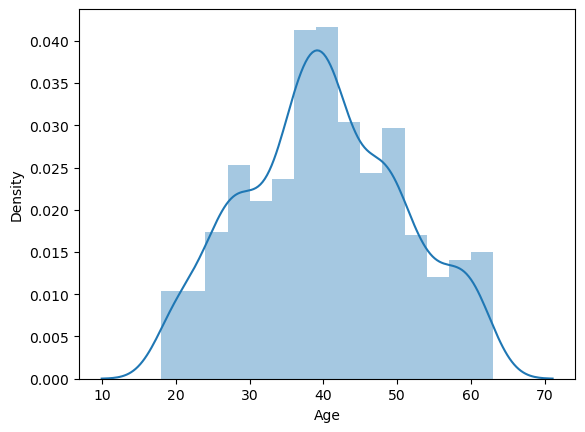

In [107]:
sns.distplot(data['Age'])
plt.show()

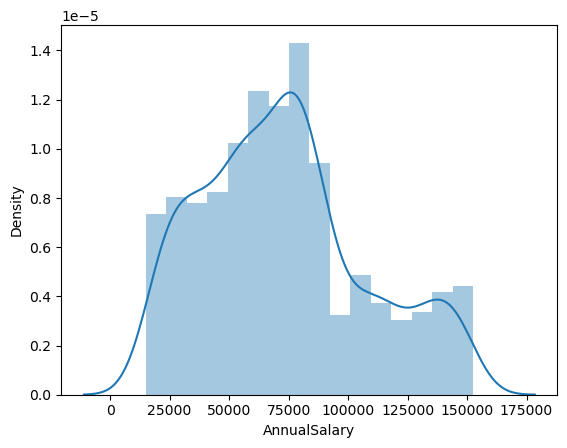

In [108]:
sns.distplot(data['AnnualSalary'])
plt.show()

<AxesSubplot: >

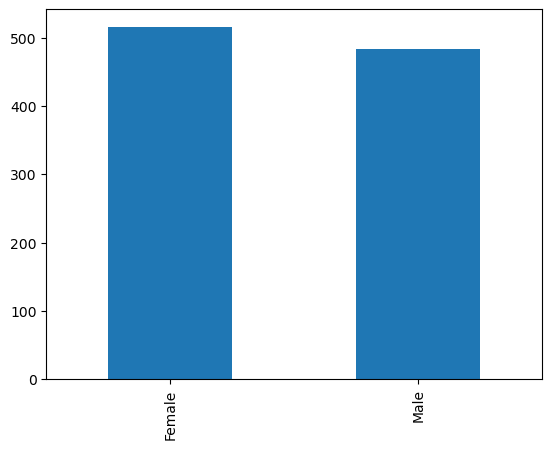

In [109]:
data['Gender'].value_counts().plot(kind = 'bar')

        Decision Tree

In [110]:
Label_encoder = LabelEncoder()
data['Gender'] = Label_encoder.fit_transform(data['Gender'])
data.head()
# 1 : Male
# 0 : Female

,User ID,Gender,Age,AnnualSalary,Purchased
0,385,1,35,20000,0
1,681,1,40,43500,0
2,353,1,49,74000,0
3,895,1,40,107500,1
4,661,1,25,79000,0


In [111]:
X = data[['Gender','Age','AnnualSalary']]
y = data[['Purchased']]
X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7)

In [112]:
clf = tree.DecisionTreeClassifier()
clf = clf.fit(X_train,y_train)

In [113]:
predictions = clf.predict(X_test)

In [114]:
accuracy_score(y_test,predictions)

0.8833333333333333

In [115]:
confusion_matrix(y_test, predictions, labels=[0,1])

array([[165,  21],
       [ 14, 100]], dtype=int64)

In [116]:
print("The precision is :", precision_score(y_test,predictions))
print("The recall is :", recall_score(y_test,predictions))

The precision is : 0.8264462809917356
The recall is : 0.8771929824561403


In [117]:
new_client = np.array([1, 30, 20000])
new_client = new_client.reshape(1, -1)
x = clf.predict(new_client)
Status = ['No purchase', 'Purchase']
Status[x[0]]

'No purchase'

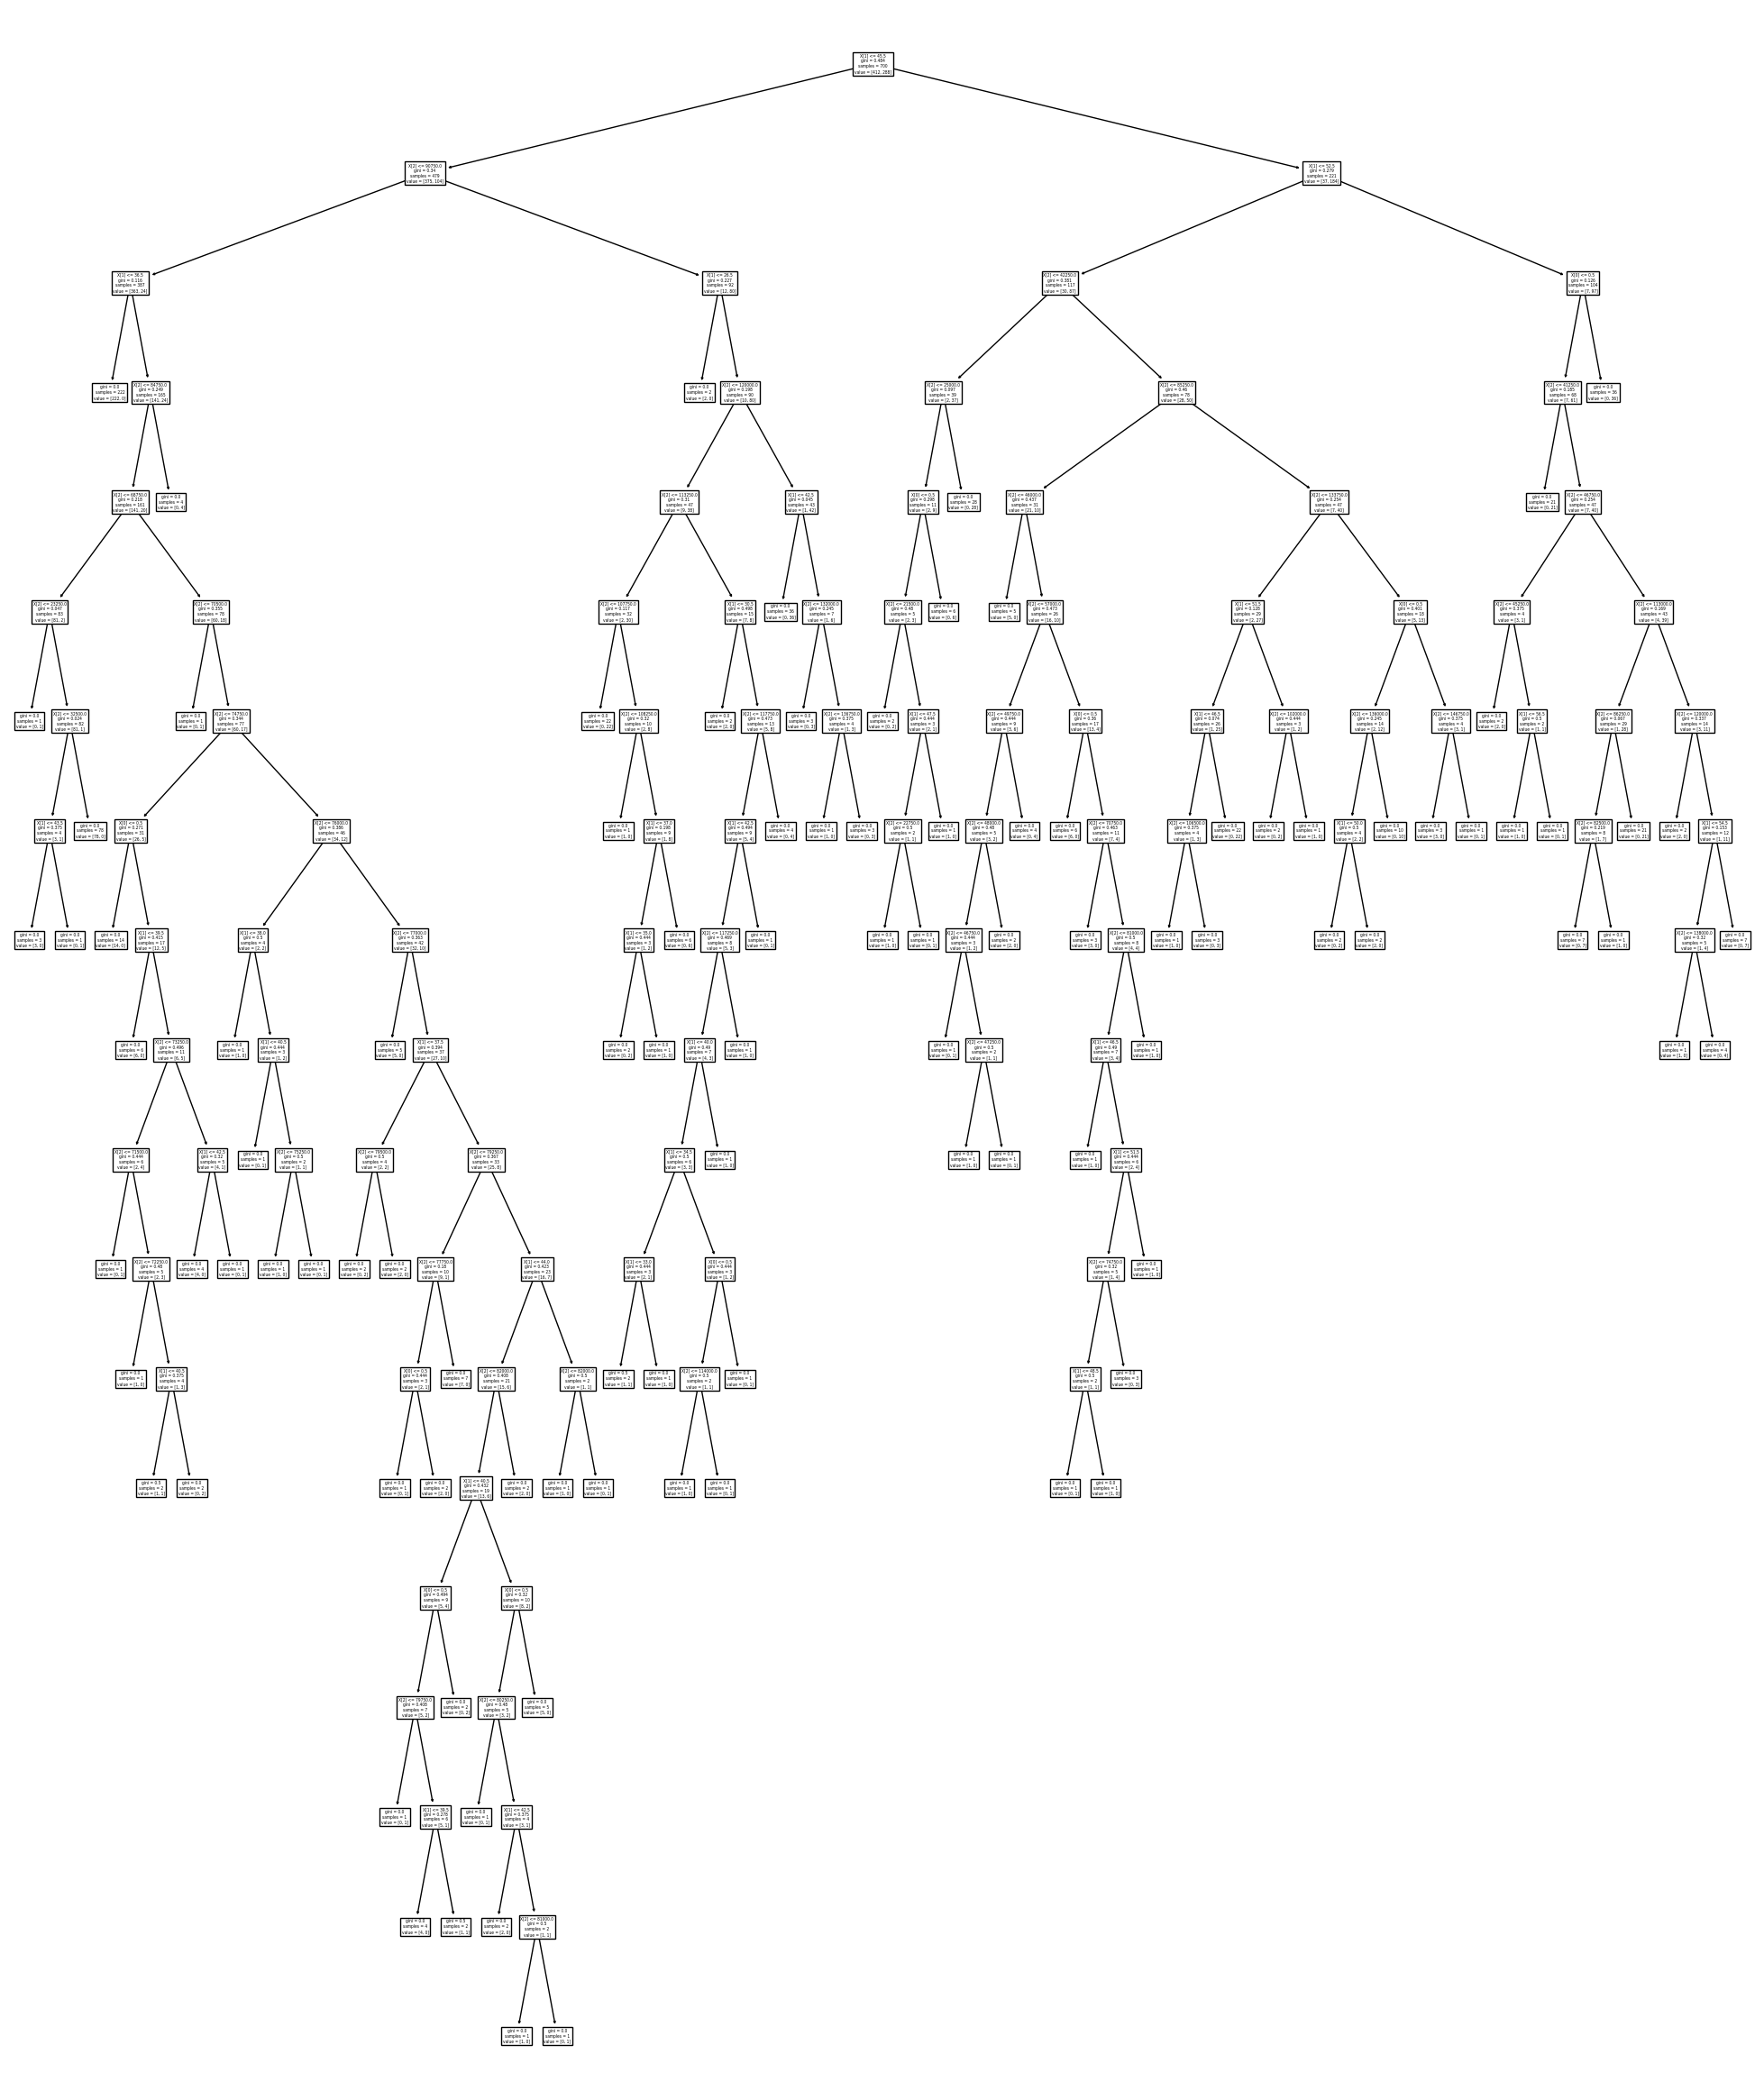

In [118]:
plt.figure(figsize=(25,30))
_ = tree.plot_tree(clf)

            New tree

In [119]:
X2 = data[['Age','AnnualSalary']]
y2 = data[['Purchased']]
X2_train, X2_test, y2_train, y2_test = train_test_split(X2,y2,train_size=0.7)

In [120]:
clf2 = tree.DecisionTreeClassifier()
clf2 = clf2.fit(X2_train,y2_train)

In [121]:
predictions2 = clf2.predict(X2_test)
accuracy_score(y2_test,predictions2)

0.86

In [122]:
print("The precision is :", precision_score(y2_test,predictions2))
print("The recall is :", recall_score(y2_test,predictions2))

The precision is : 0.8305084745762712
The recall is : 0.8166666666666667


In [123]:
new_client2 = np.array([30, 20000])
new_client2 = new_client2.reshape(1, -1)
x = clf2.predict(new_client2)
Status = ['No purchase', 'Purchase']
Status[x[0]]

'No purchase'

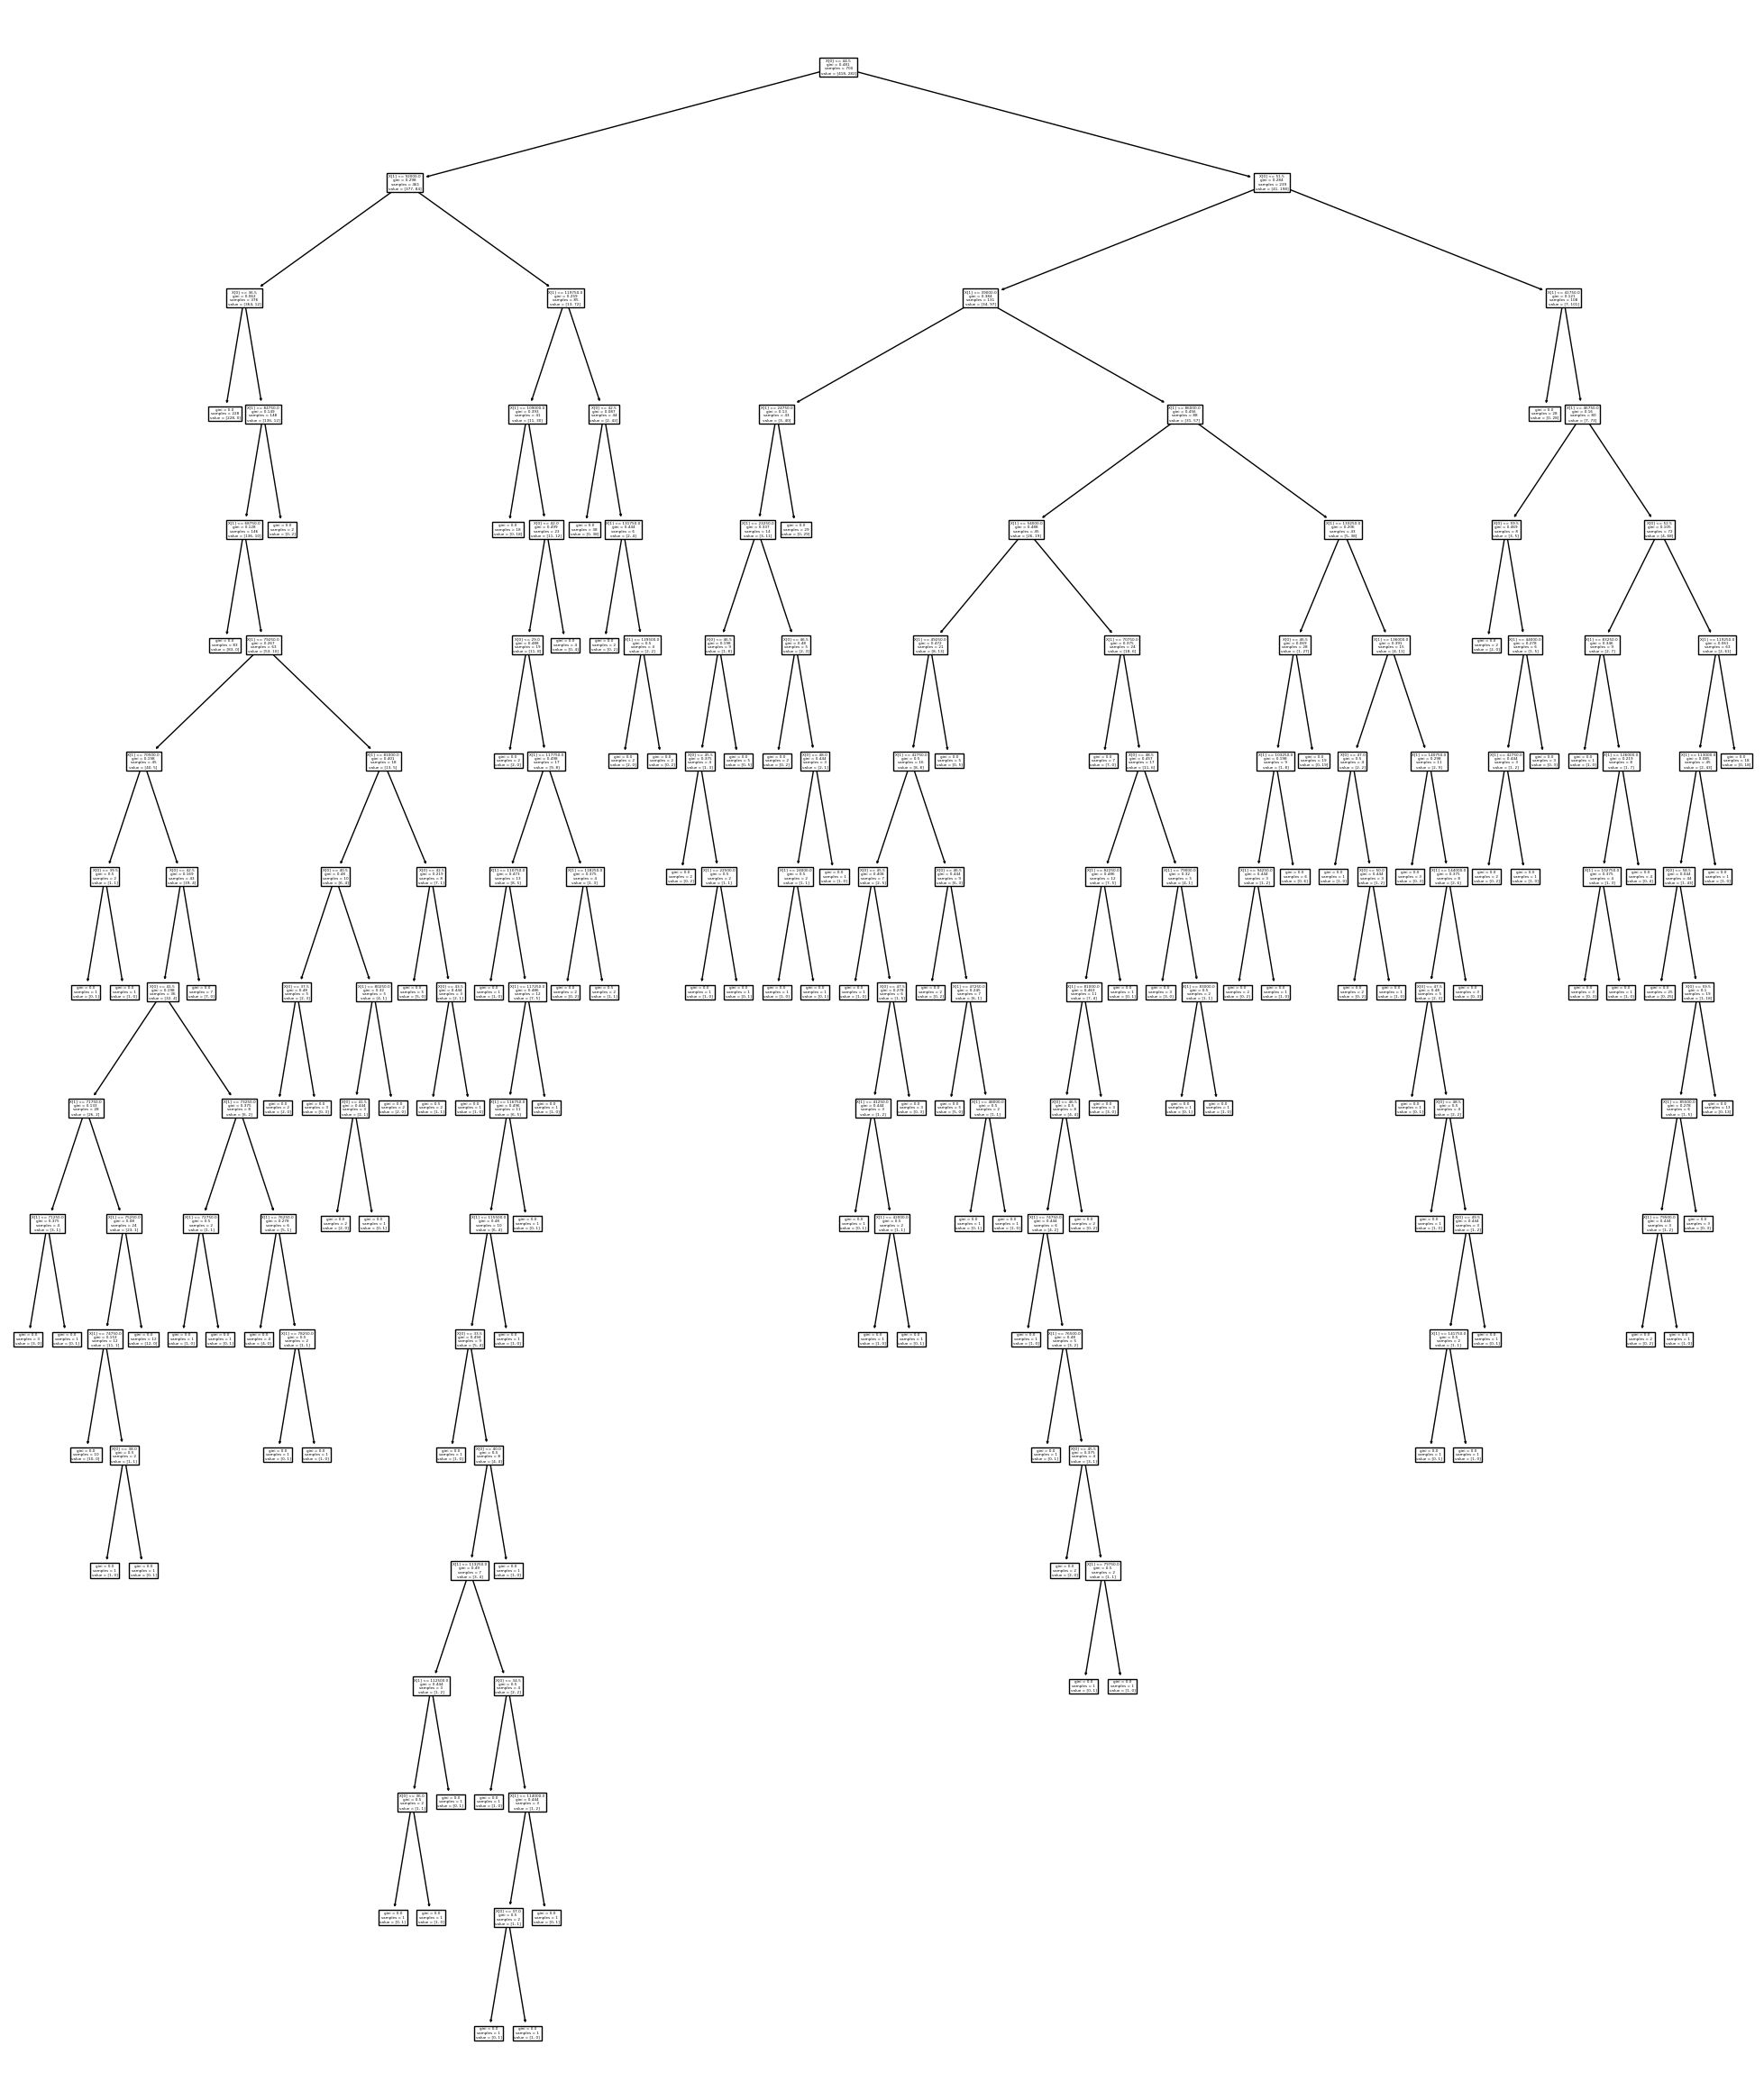

In [124]:
plt.figure(figsize=(25,30))
_ = tree.plot_tree(clf2)

            Improving the tree

In [125]:
clf3 = tree.DecisionTreeClassifier(ccp_alpha = 0.01)
clf3 = clf3.fit(X2_train,y2_train)

In [126]:
predi3 = clf3.predict(X2_test)

In [127]:
accuracy_score(y2_test,predi3)

0.89

In [128]:
new_client2 = np.array([30, 20000])
new_client2 = new_client2.reshape(1, -1)
x = clf3.predict(new_client2)
Status = ['No purchase', 'Purchase']
Status[x[0]]

'No purchase'

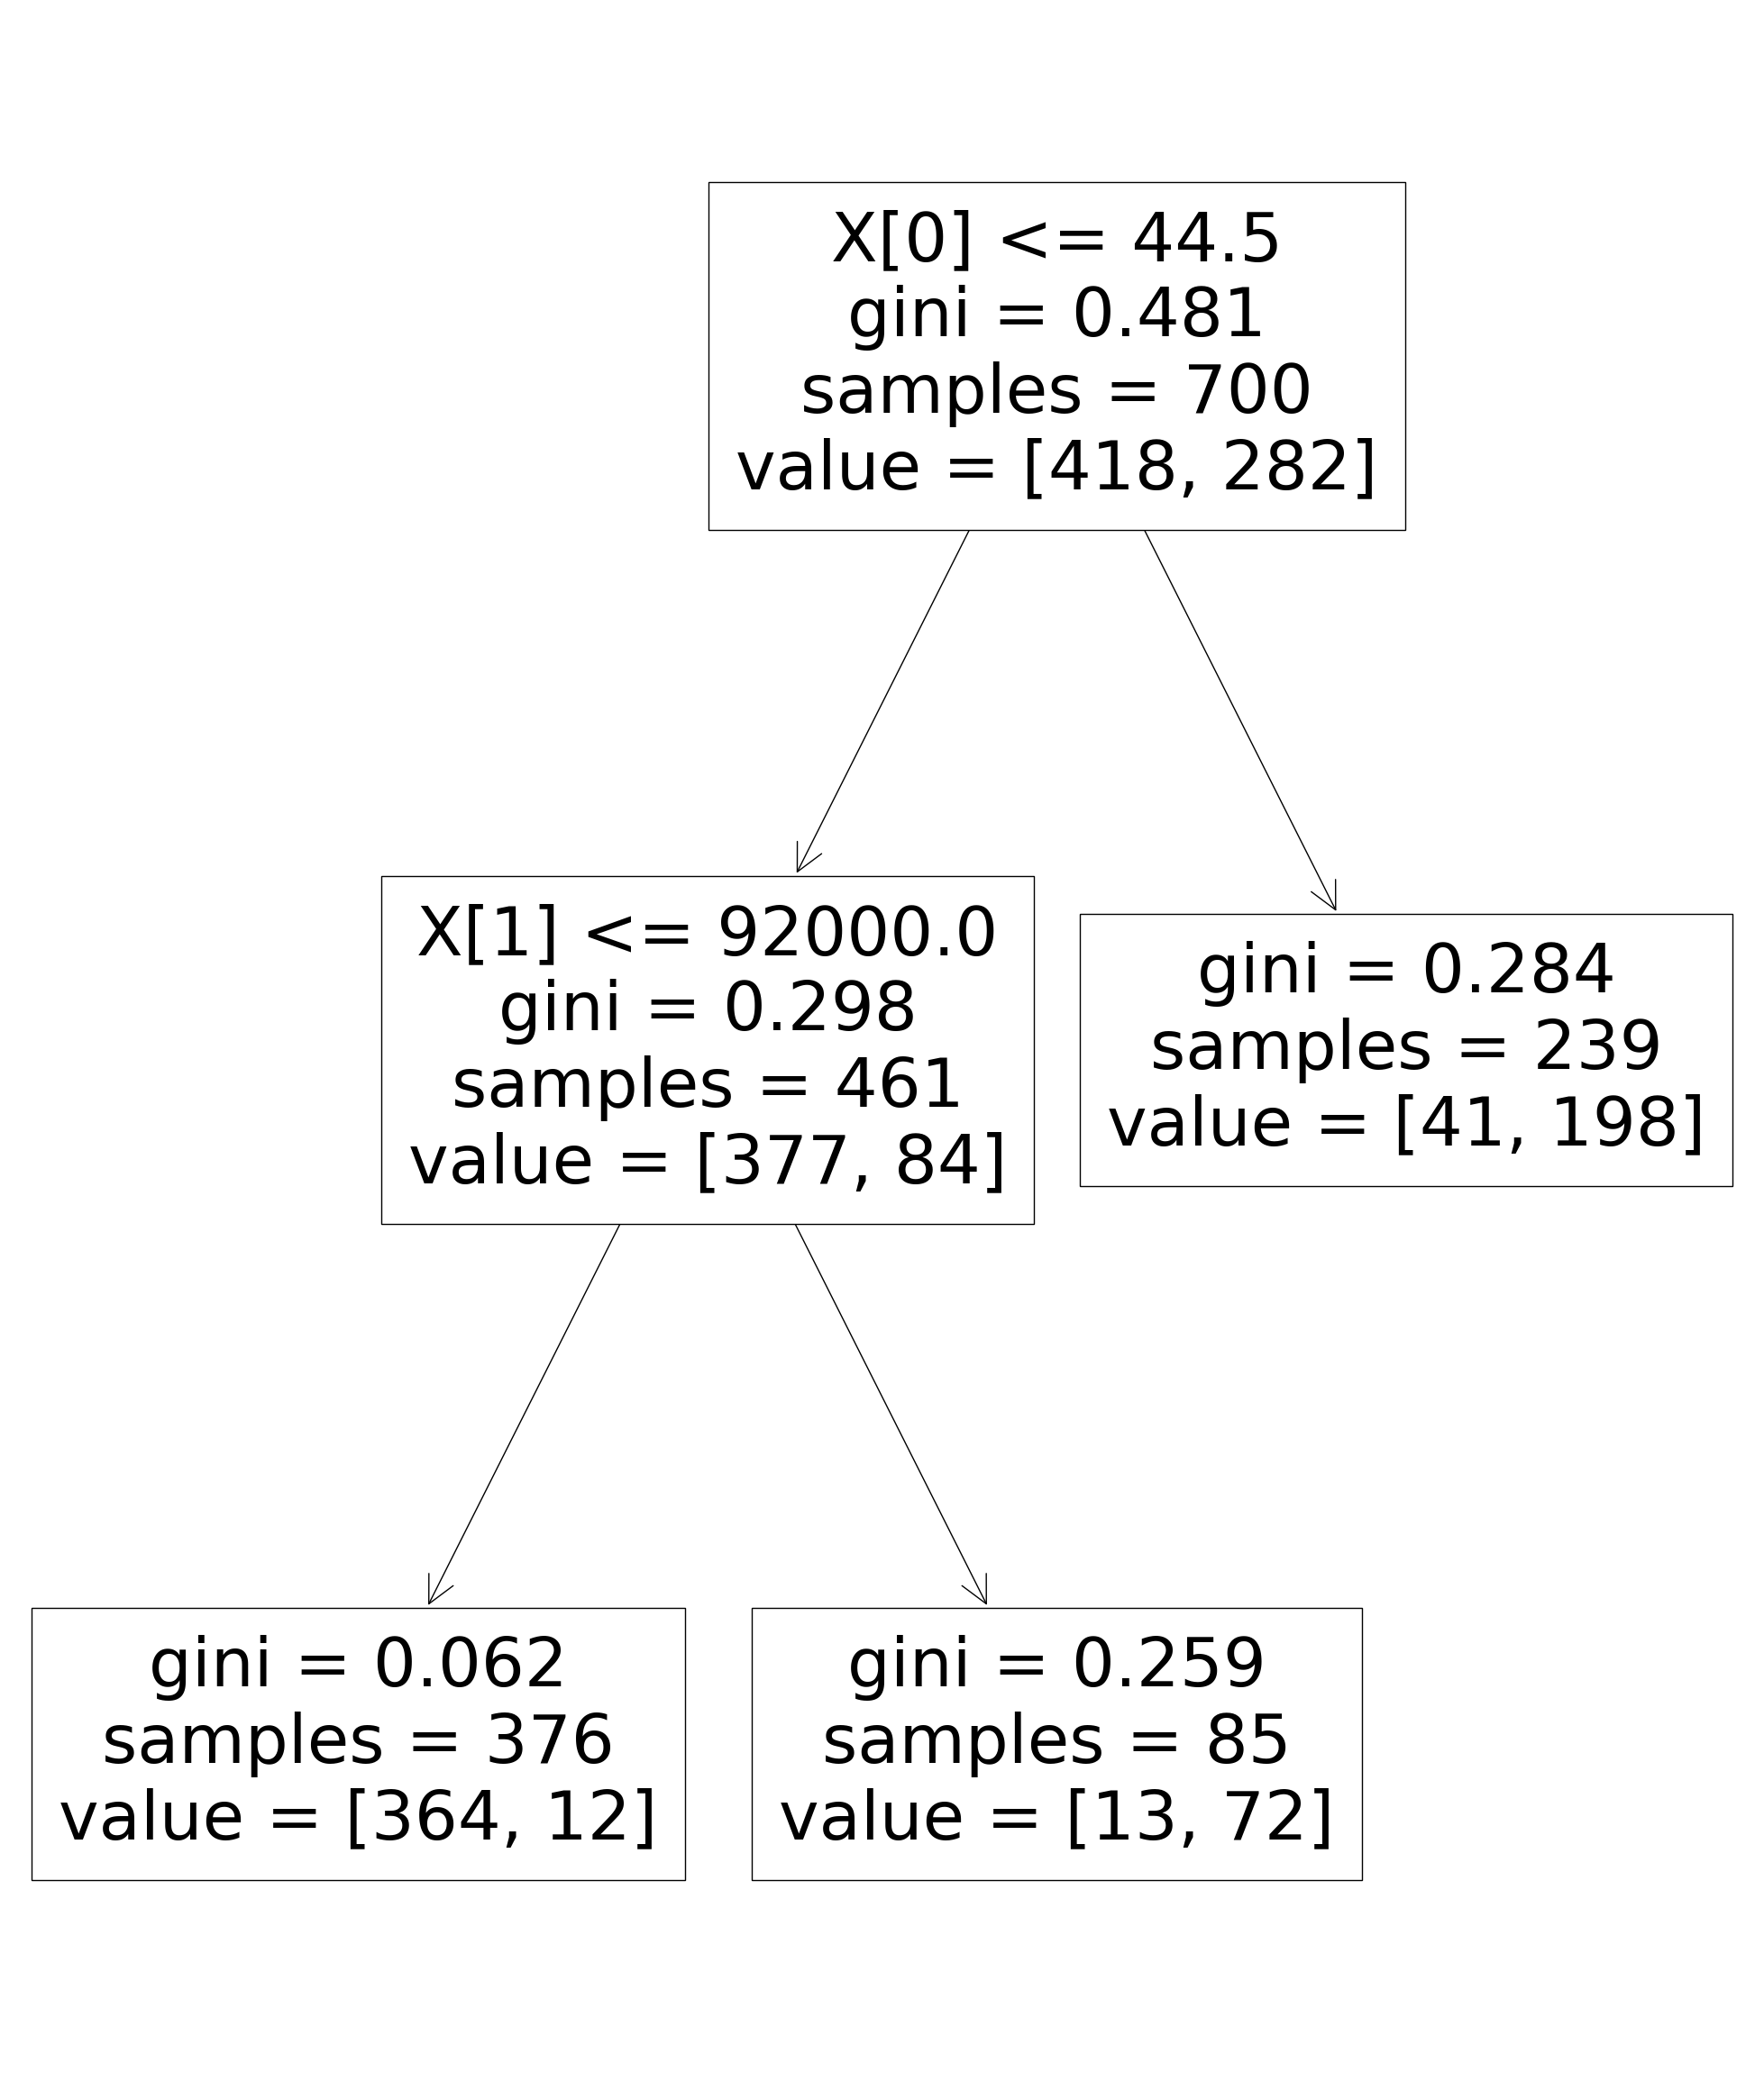

In [129]:
plt.figure(figsize=(25,30))
_ = tree.plot_tree(clf3)